In [1]:
from abc import ABC, abstractmethod
from dataclasses import dataclass, field
from typing import Set, Dict, Tuple

import numpy as np
from matplotlib import pyplot as plt
from sympy import Expr, Basic, solve, Symbol, arg, Abs, symbols, exp, I, besselj, lambdify


Выбрать в качестве входного сигнала $ f(x) = \exp(i\beta x), $ где $\beta = 1/10$

In [2]:
x, b = symbols('x b')
fx = exp(I*b*x)
fx_ = fx.subs({b: 0.1})
fx_

exp(0.1*I*x)

Построить график исходного оптического сигнала (здесь и далее: подразумевается, что строить нужно амплитуду и фазу на отдельных изображениях). Изменяя параметр $\beta$ (задавая его как большим, так и близким к нулю, а также рассматривая отрицательные значения), сделать вывод о том, как он влияет на график исходной функции. Привести несколько графиков для подкрепления выводов. После этого вернуть параметр $\beta$ в начальное значение. Число n можно задать равным 1000.

In [3]:
func_arg = arg(fx)
func_abs = Abs(fx)
print(func_abs)
print(func_arg)

exp(-im(b*x))
arg(exp(I*b*x))


In [4]:
n = 1000
x_range = np.linspace(-100, 100, n)

Построим $Arg(f(x))$ для задавая разные $\beta$

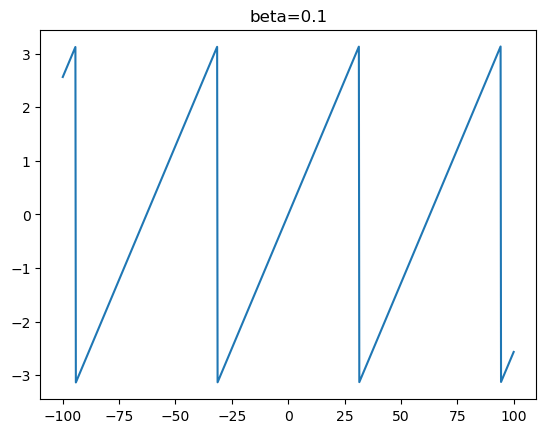

In [5]:
beta=0.1
plt.plot(x_range, [func_arg.subs({x: val, b: beta}).evalf() for val in x_range])
plt.title(f"beta={beta}")
plt.show()

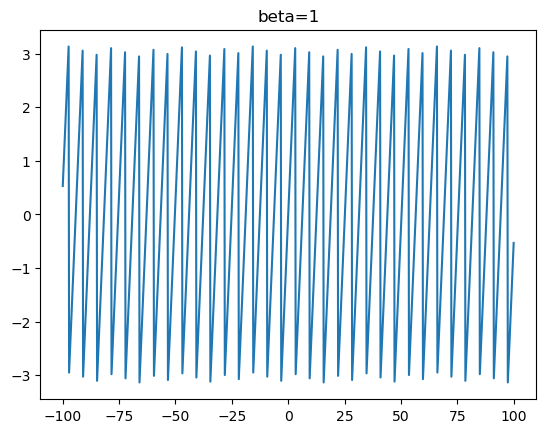

In [6]:
beta=1
plt.plot(x_range, [func_arg.subs({x: val, b: beta}).evalf() for val in x_range])
plt.title(f"beta={beta}")
plt.show()

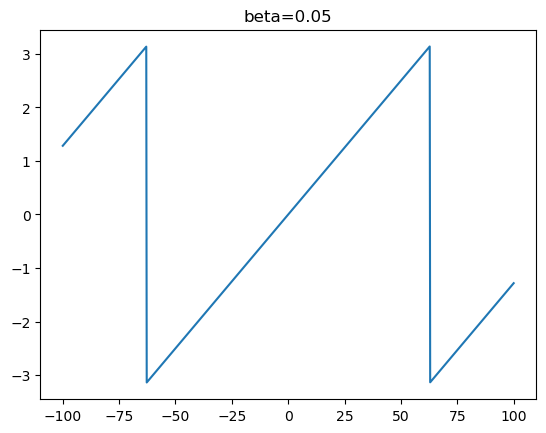

In [7]:
beta=0.05
plt.plot(x_range, [func_arg.subs({x: val, b: beta}).evalf() for val in x_range])
plt.title(f"beta={beta}")
plt.show()

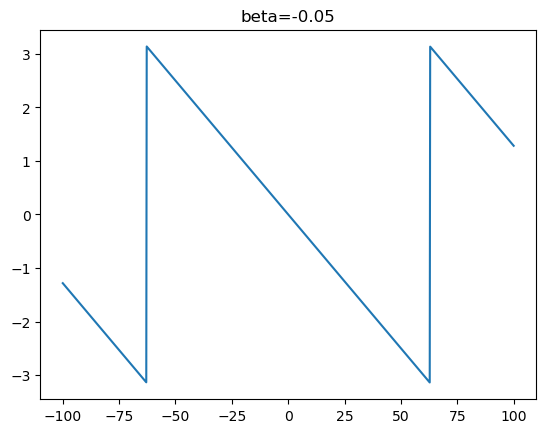

In [8]:
beta=-0.05
plt.plot(x_range, [func_arg.subs({x: val, b: beta}).evalf() for val in x_range])
plt.title(f"beta={beta}")
plt.show()

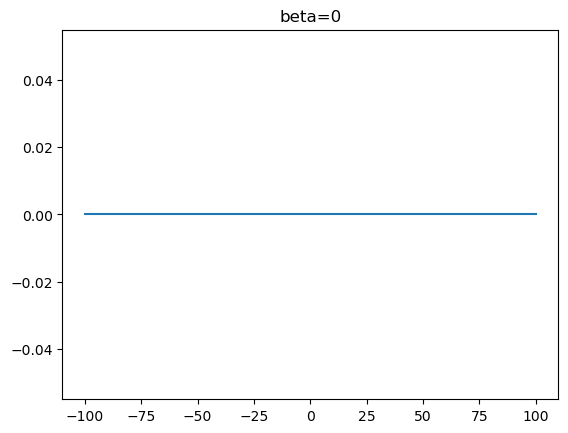

In [9]:
beta=0
plt.plot(x_range, [func_arg.subs({x: val, b: beta}).evalf() for val in x_range])
plt.title(f"beta={beta}")
plt.show()

Построим $Abs(f(x))$ для задавая разные $\beta$

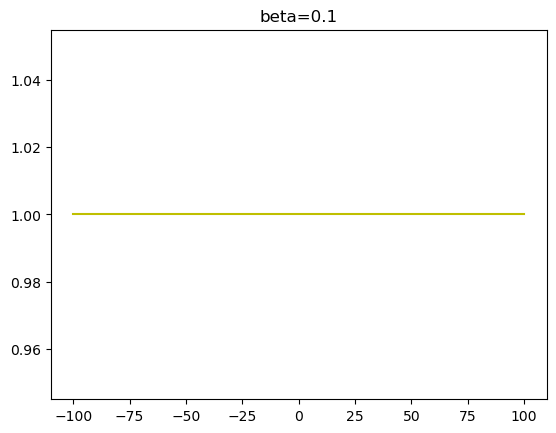

In [10]:
beta=0.1
plt.plot(x_range, [func_abs.subs({x: val, b: beta}).evalf() for val in x_range], c='y')
plt.title(f"beta={beta}")
plt.show()

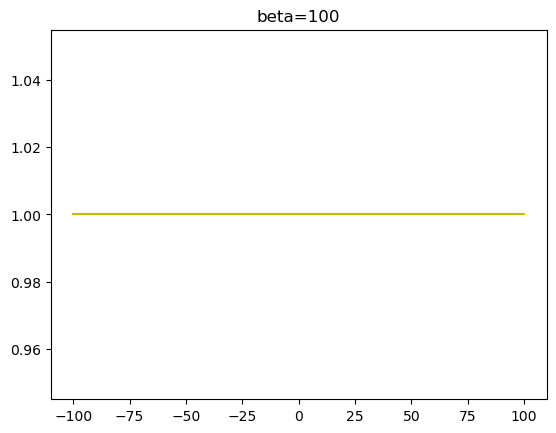

In [11]:
beta=100
plt.plot(x_range, [func_abs.subs({x: val, b: beta}).evalf() for val in x_range], c='y')
plt.title(f"beta={beta}")
plt.show()

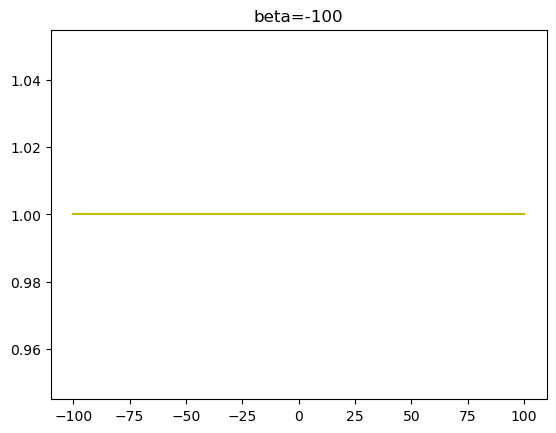

In [12]:
beta=-100
plt.plot(x_range, [func_abs.subs({x: val, b: beta}).evalf() for val in x_range], c='y')
plt.title(f"beta={beta}")
plt.show()

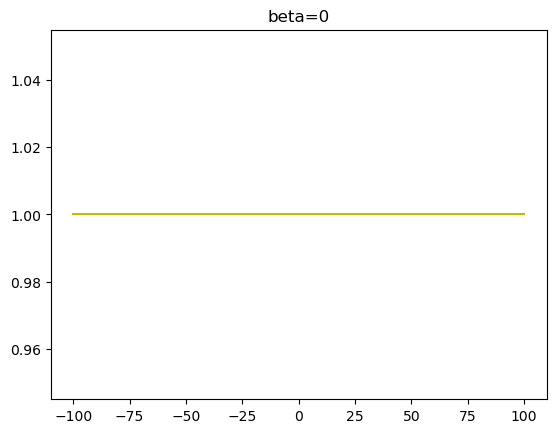

In [13]:
beta=0
plt.plot(x_range, [func_abs.subs({x: val, b: beta}).evalf() for val in x_range], c='y')
plt.title(f"beta={beta}")
plt.show()

Вывод: для $Arg(f(x))$ увеличение $\beta$ ведет к сжатию графика вдоль оси абсцисс, чем ближе $\beta$ к нулю, тем сильнее растягивается график в доль оси абсцисс, пока полностью с ней не совпадет при $\beta$ = 0, при отрицательных $\beta$ график симметрично отражается относительно оси ординат. $Abs(f(x))$ постоянная при $\forall\beta$ и равно $1$

Реализовать численный расчёт интегрального преобразования над одномерным| сигналом, принять $\alpha =1$, $m = 1000$


$K(\xi, x) = J_0(\alpha\xi x)x \\ [a, b] = [0, c], c=5 \\ [p, q]=[0,3] \\ F = Af \cdot h_x , \ F = \begin{pmatrix} F_0 \\ ... \\ F_m \end{pmatrix}, f = \begin{pmatrix} f_0 \\ ... \\ f_n \end{pmatrix}, A = (K(\xi_l,x_k))^{m,n}_{l=0, k=0},  \\ h_x = (b-a)/n, x_k = a+kh_x \\ h_\xi = (q-p)/m, \xi_l = p+lh_\xi, l=0, m $ 

In [14]:
from scipy.special import jv
from scipy.special import j0  # Bessel function of the first kind, order 0

In [27]:
def calc_and_plot_F(K: Expr,
                    fx: Expr,
                    alpha: float = 1,
                    m: int = 100,
                    n: int = 100,
                    a: float = 1,
                    b: float = 5,
                    p: float = 0,
                    q: float = 3):
    
    # Определяем шаг сетки
    hx = (b - a) / n
    
    # Задаем диапазоны значений
    x_diapason = np.linspace(a, b, n)
    ksi_diapason = np.linspace(p, q, m)
    
    # Векторизируем вычисление f(x) для всех значений x
    f_func = lambdify(x, fx, 'numpy')
    f_values = f_func(x_diapason)  # Вектор значений функции f(x)
    
    # Векторизируем вычисление матрицы A
    K_func = lambdify([x, ksi], K, modules= {'numpy': np, 'besselj': jv})
    X, KSI = np.meshgrid(x_diapason, ksi_diapason)
    A = K_func(X, KSI)  # Мгновенное вычисление всей матрицы K(x, ksi)

    # Вычисляем F
    F = A @ f_values * hx

    # Графики аргумента и модуля функции F
    plt.plot(ksi_diapason, np.angle(F), c='b', label='Arg')
    plt.plot(ksi_diapason, np.abs(F), c='g', label='Abs')
    plt.title(f'Parameters: alpha={alpha}, a={a}, b={b}, p={p}, q={q}')
    plt.legend()
    plt.grid()
    plt.show()

In [79]:
def calc_and_plot_K(K, alpha, m, n, a, b, p, q):
    
    
    # Определяем диапазоны x и ksi
    x_diapason = np.linspace(a, b, m)
    ksi_diapason = np.linspace(p, q, n)
    
    # Создаем сетку значений x и ksi
    X, Ksi = np.meshgrid(x_diapason, ksi_diapason)
    
    # Преобразуем символьную функцию в численную
    K_func = lambdify([x, ksi], K, modules={'numpy': np, 'besselj': jv})

    # Рассчитываем значения функции K(x, ksi)
    K_values = K_func(X, Ksi)
    
    # Рассчитываем амплитуду и фазу
    amplitude_values = np.abs(K_values)  # Амплитуда
    phase_values = np.angle(K_values)    # Фаза
    
    # Создаем два подграфика: один для амплитуды, другой для фазы
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Визуализируем амплитуду
    amplitude_plot = ax1.pcolormesh(X, Ksi, amplitude_values, shading='auto', cmap='jet')
    fig.colorbar(amplitude_plot, ax=ax1, label='Amplitude')
    ax1.set_xlabel('x')
    ax1.set_ylabel('ksi')
    ax1.set_title('Amplitude of $K(x, \\xi)$')

    # Визуализируем фазу
    phase_plot = ax2.pcolormesh(X, Ksi, phase_values, shading='auto', cmap='jet')
    fig.colorbar(phase_plot, ax=ax2, label='Phase')
    ax2.set_xlabel('x')
    ax2.set_ylabel('ksi')
    ax2.set_title('Phase of $K(x, \\xi)$')

    plt.tight_layout()
    plt.show()

In [80]:
m = 1000
n = 1000
a, b = 0, 5
p, q = 0, 3

In [81]:
ksi = Symbol('ksi')
alpha = 1
K = besselj(0, alpha*x*ksi)*x

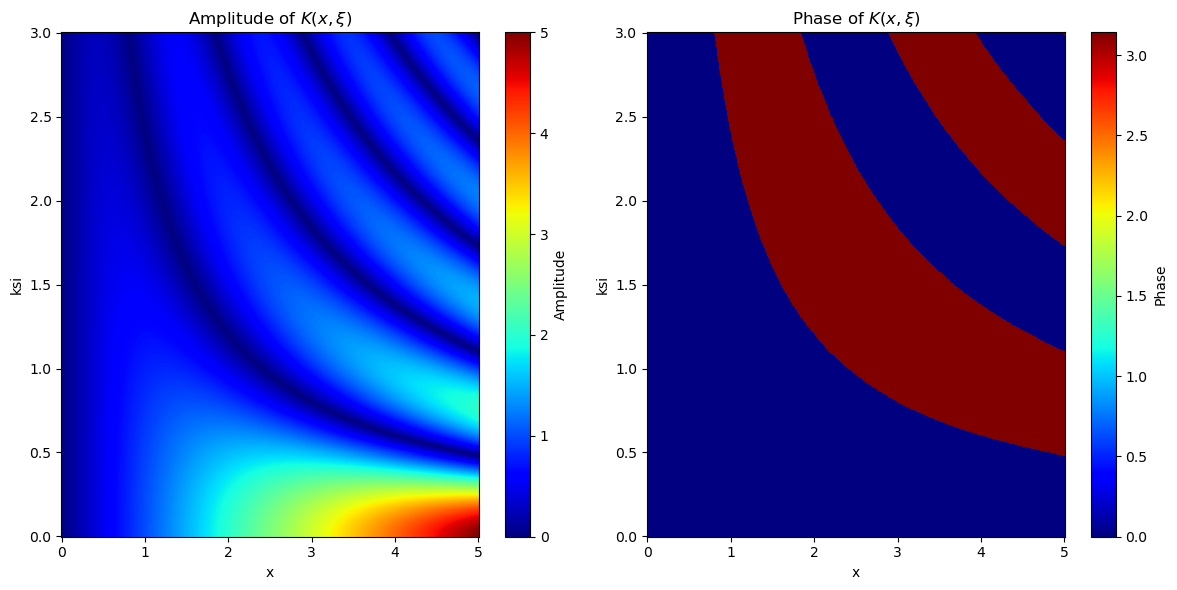

In [82]:
calc_and_plot_K(K, alpha=1, m=m, n=n, a=a, b=b, p=p, q=q)

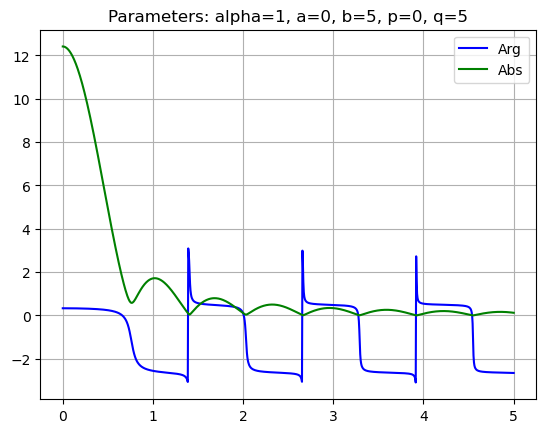

In [39]:
calc_and_plot_F(K=K,
                    fx=fx_,
                    alpha=1,
                    m=1000,
                    n=1000,
                    a=0,
                    b=5,
                    p=0,
                    q=5)

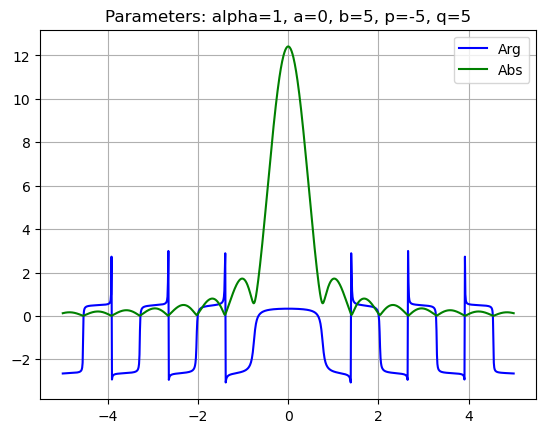

In [40]:
calc_and_plot_F(K=K,
                    fx=fx_,
                    alpha=1,
                    m=1000,
                    n=1000,
                    a=0,
                    b=5,
                    p=-5,
                    q=5)

При увеличении $|p - q|$ мы видим больший участок графика вдоль абсцисс.

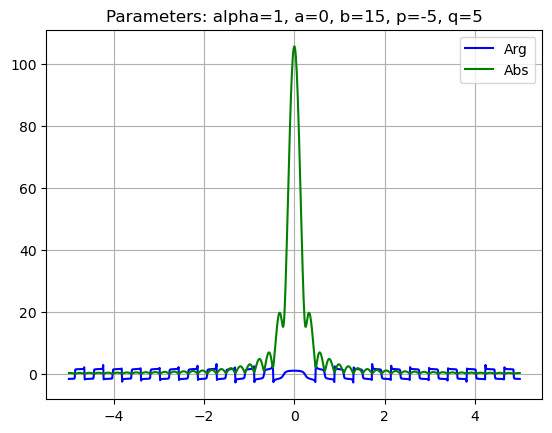

In [41]:
calc_and_plot_F(K=K,
                    fx=fx_,
                    alpha=1,
                    m=1000,
                    n=1000,
                    a=0,
                    b=15,
                    p=-5,
                    q=5)

При увеличении $b$ (варьируя параметр $c$) наблюдается симметричное сжатие графиков $Arg$ и $Abs$ к оси ординат, а также увеличение значений $Abs$.

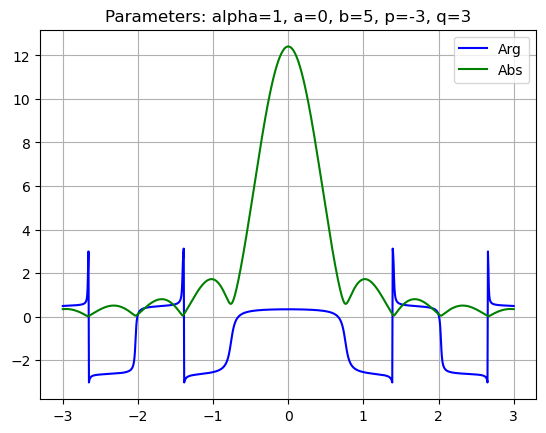

In [42]:
calc_and_plot_F(K=K,
                    fx=fx_,
                    alpha=1,
                    m=1000,
                    n=1000,
                    a=0,
                    b=5,
                    p=-3,
                    q=3)

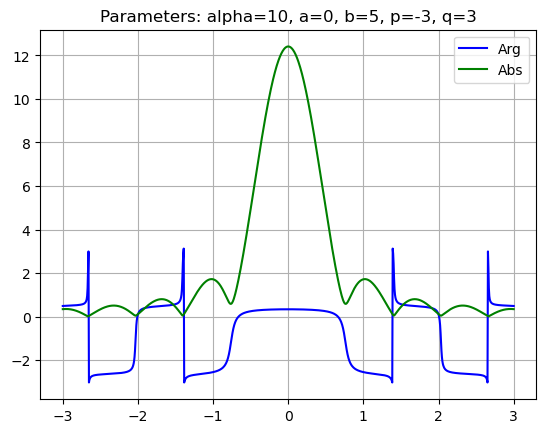

In [43]:
calc_and_plot_F(K=K,
                    fx=fx_,
                    alpha=10,
                    m=1000,
                    n=1000,
                    a=0,
                    b=5,
                    p=-3,
                    q=3)

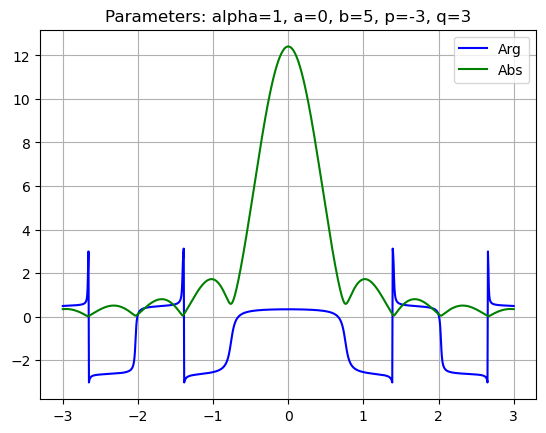

In [44]:
calc_and_plot_F(K=K,
                    fx=fx_,
                    alpha=1,
                    m=1000,
                    n=1000,
                    a=0,
                    b=5,
                    p=-3,
                    q=3)

In [47]:
alpha = 3
K = besselj(0, alpha*x*ksi)*x
K

x*besselj(0, 3*ksi*x)

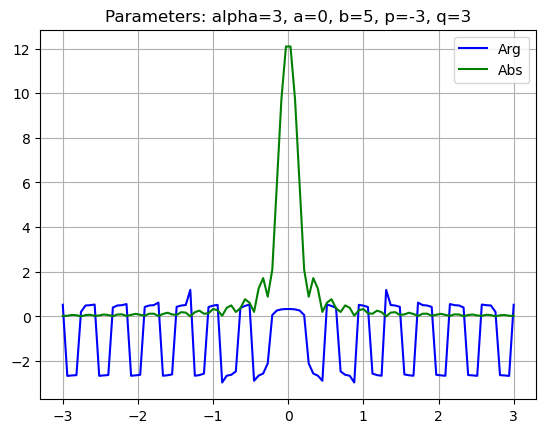

In [49]:
calc_and_plot_F(K=K,
                    fx=fx_,
                    alpha=3,
                    m=100,
                    n=100,
                    a=0,
                    b=5,
                    p=-3,
                    q=3)

При увеличении $\alpha$ график сжимается по оси абсцисс